In [2]:
import nltk

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Exploratory Data Analysis

In [6]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [7]:
df['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df['location'].nunique()

3341

In [10]:
df['location'].isnull().sum()

2533

In [11]:
df = df.drop('location', axis = 1) # Too many unique locations and nulls values, So dropping it.


In [12]:
100 * 61/ len(df)

0.8012610009194798

In [13]:
df.dropna(axis=0, inplace=True) #Only 0.8 percent missing, so dropping null values

In [14]:
df.isnull().sum() 

id         0
keyword    0
text       0
target     0
dtype: int64

In [15]:
df['length'] = df['text'].apply(len)
df.head()

,id,keyword,text,target,length
31,48,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55
32,49,ablaze,We always try to bring the heavy. #metal #RT h...,0,67
33,50,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82
34,52,ablaze,Crying out for more! Set me ablaze,0,34
35,53,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76


In [16]:
df = df.drop('id', axis=1)

In [17]:
df.corr()['target'].sort_values

<bound method Series.sort_values of target    1.000000
length    0.180539
Name: target, dtype: float64>

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

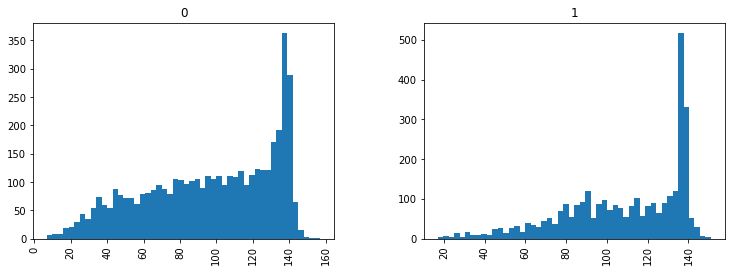

In [18]:
df.hist(column='length', by='target', bins=50, figsize=(12,4))

## Preprocessing

In [19]:
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [20]:
def text_preprocess(text):
    #Remove punctuation
    nonpunc =  [char for char in text if char not in string.punctuation]
    nonpunc = ''.join(nonpunc)
    
    #Stemming
    #nonpunc = stemmer.stem(nonpunc)
    
    #Remove stop words
    return [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

## Vectorization

In [21]:
#Fitting and Transforming Text Using Countvectorization and Tfid

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow_transformer = CountVectorizer(analyzer=text_preprocess).fit(df['text'])
print(len(bow_transformer.vocabulary_))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\fenaz/nltk_data'
    - 'G:\\Anaconda\\nltk_data'
    - 'G:\\Anaconda\\share\\nltk_data'
    - 'G:\\Anaconda\\lib\\nltk_data'
    - 'C:\\Users\\fenaz\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
tenth_data = text_preprocess(df['text'].iloc[13])
tenth_data

In [ ]:
tenth_bow = bow_transformer.transform(tenth_data)
print(tenth_bow)

In [ ]:
print(bow_transformer.get_feature_names_out()[11427])

In [ ]:
text_bow = bow_transformer.transform(df['text'])

In [ ]:
text_bow

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfid_transformer = TfidfTransformer().fit(text_bow)


In [ ]:
text_tfidf = tfid_transformer.transform(text_bow)
print(text_tfidf.shape)

In [ ]:
print(tfid_transformer.idf_[bow_transformer.vocabulary_['u']])

## Training Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB().fit(text_tfidf, df['target'])

In [ ]:
predictions =  model.predict(text_tfidf)

In [ ]:
print(len(predictions))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(df['target'], predictions))
print(confusion_matrix(df['target'], predictions))

In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
test_df = test_df.drop('location', axis = 1)
test_df.dropna(axis=0, inplace=True)
test_df = test_df.drop('id', axis=1)

In [ ]:
test_df.head()

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocess)),
    ('tfidf', TfidfTransformer()),
    ('classifer', MultinomialNB()),
])

In [ ]:
X_train = df['text']
y_train = df['target']

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
X_test = test_df['text']

In [ ]:
pipe_predictions = pipeline.predict(X_test)

In [ ]:
df_submission = pd.DataFrame(pipe_predictions)

In [ ]:
df_submission

In [ ]:
ver_submission = pd.read_csv("submission.csv")

In [ ]:
test_predict = ver_submission['target']

In [ ]:
df